# Análisis de datos de postulaciones a avisos en el periodo: 15-Enero al 28-Febrero del 2018

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")
sns.set(font_scale=1.5)

In [3]:
def get_postulaciones():
    postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
    columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'id_postulante', 'fechapostulacion': 'fecha_postulacion'}
    postulaciones = postulaciones.rename(columns=columns_rename)
    postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
    return postulaciones

def get_avisos_detalle():
    avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
    columns_rename = {'idpostulante': 'id_postulante', 'idaviso': 'id_aviso'}
    avisos_detalle = avisos_detalle.rename(columns=columns_rename)
    to_nivel_laboral_nro = {'Senior / Semi-Senior' : 2, 'Junior':1, 'Otro':0,
       'Jefe / Supervisor / Responsable':3,
       'Gerencia / Alta Gerencia / Dirección':4}
    avisos_detalle['nivel_laboral_nro']= avisos_detalle['nivel_laboral'].map(to_nivel_laboral_nro)
    return avisos_detalle

def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['fechanacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<25): return 'Entre 18 y 24'
    if(age<30): return 'Entre 25 y 30'
    if(age<35): return 'Entre 30 y 35'
    if(age<40): return 'Entre 35 y 40'
    if(age<45): return 'Entre 40 y 45'
    if(age<50): return 'Entre 45 y 50'
    return 'Mayor de 50'

def get_order_for_age_range():
    return ['Entre 18 y 24', 'Entre 25 y 30','Entre 30 y 35','Entre 35 y 40','Entre 40 y 45','Entre 45 y 50', 'Mayor de 50']

def get_postulantes_genero_edad():
    postulantes_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')
    postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
    postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
    postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)
    columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento_postulante', 'sexo': 'genero_postulante'}
    postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
    postulantes_genero_edad = postulantes_genero_edad[['id_postulante', 'genero_postulante', 'fecha_nacimiento_postulante', 'edad_postulante', 'rango_edad_postulante']]
    postulantes_genero_edad['genero_postulante'] = postulantes_genero_edad['genero_postulante'].map({'FEM': 'Femenino', 'MASC': 'Masculino', 'NO_DECLARA': 'No declara'})
    #Nos interesan los que indicaron el genero masculino o femenino para nuestro análisis
    return postulantes_genero_edad[postulantes_genero_edad['genero_postulante']!='No declara']

def get_detalle_postulaciones():
    postulaciones = get_postulaciones()
    avisos = get_avisos_detalle()
    postulantes = get_postulantes_genero_edad()
    detalle_postulaciones = pd.merge(postulantes, postulaciones, on='id_postulante', how='inner') 
    detalle_postulaciones = pd.merge(detalle_postulaciones, avisos, on='id_aviso', how='inner')
    return detalle_postulaciones

def get_top_for(df, categorical_key, top_size):
    top_values = df[categorical_key].value_counts().head(top_size).index
    return df[df[categorical_key].isin(top_values)]

In [4]:
postulaciones = get_detalle_postulaciones()
postulaciones_mujeres = postulaciones[postulaciones['genero_postulante']=='Femenino']
postulaciones_varones = postulaciones[postulaciones['genero_postulante']=='Masculino']
postulaciones.head(50)

,id_postulante,genero_postulante,fecha_nacimiento_postulante,edad_postulante,rango_edad_postulante,id_aviso,fecha_postulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,nivel_laboral_nro
0,NM5M,Femenino,1970-12-03,48.0,Entre 45 y 50,1112257047,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
1,8krKL,Masculino,1972-11-06,46.0,Entre 45 y 50,1112257047,2018-01-21 09:45:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
2,EDEpY4,Femenino,1980-05-22,38.0,Entre 35 y 40,1112257047,2018-01-15 09:07:25,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
3,1lejrO,Femenino,1968-05-05,50.0,Mayor de 50,1112257047,2018-01-16 06:01:50,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
4,Y0MNYJ,Femenino,1977-02-28,41.0,Entre 40 y 45,1112257047,2018-01-16 16:22:36,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
5,1lGQr3,Femenino,1977-10-21,41.0,Entre 40 y 45,1112257047,2018-01-19 08:18:33,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
6,eXElKj,Femenino,1973-12-23,45.0,Entre 45 y 50,1112257047,2018-01-24 07:21:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
7,NM2bpB,Femenino,1969-03-20,49.0,Entre 45 y 50,1112257047,2018-02-01 09:09:12,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
8,YlQ8GX,Masculino,1976-07-23,42.0,Entre 40 y 45,1112257047,2018-01-22 13:38:52,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
9,8ZxR5z,Femenino,1975-12-08,43.0,Entre 40 y 45,1112257047,2018-01-25 10:14:45,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0


# Las personas eligen trabajos full time.

In [6]:
postulaciones['tipo_de_trabajo'].value_counts().index

Index(['Full-time', 'Part-time', 'Pasantia', 'Por Horas', 'Temporario',
       'Por Contrato', 'Teletrabajo', 'Fines de Semana', 'Primer empleo'],
      dtype='object')

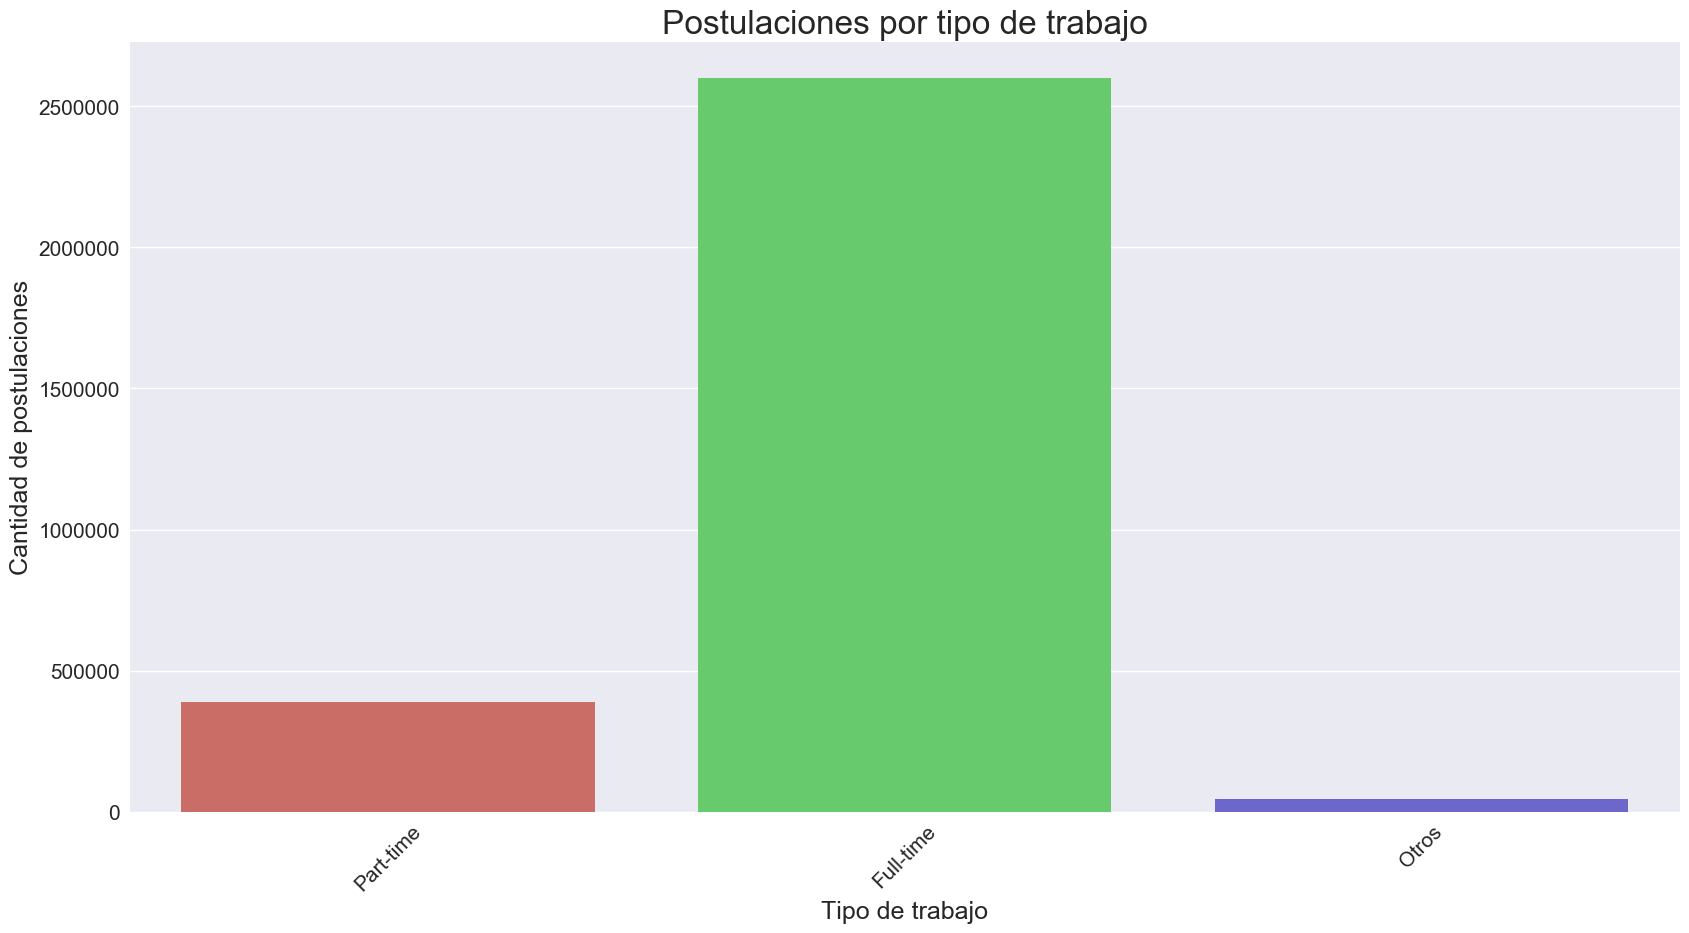

In [55]:
tipos_trabajo_mas_relevantes = ['Full-time', 'Part-time']
postulaciones['tipo_de_trabajo_compactado'] = postulaciones['tipo_de_trabajo'].map(lambda x: 'Otros' if x not in tipos_trabajo_mas_relevantes else x)
g = sns.countplot(x='tipo_de_trabajo_compactado', data=postulaciones, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Tipo de trabajo", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Postulaciones por tipo de trabajo", fontsize=24)

# Los varones se postulan más a las posiciones full time

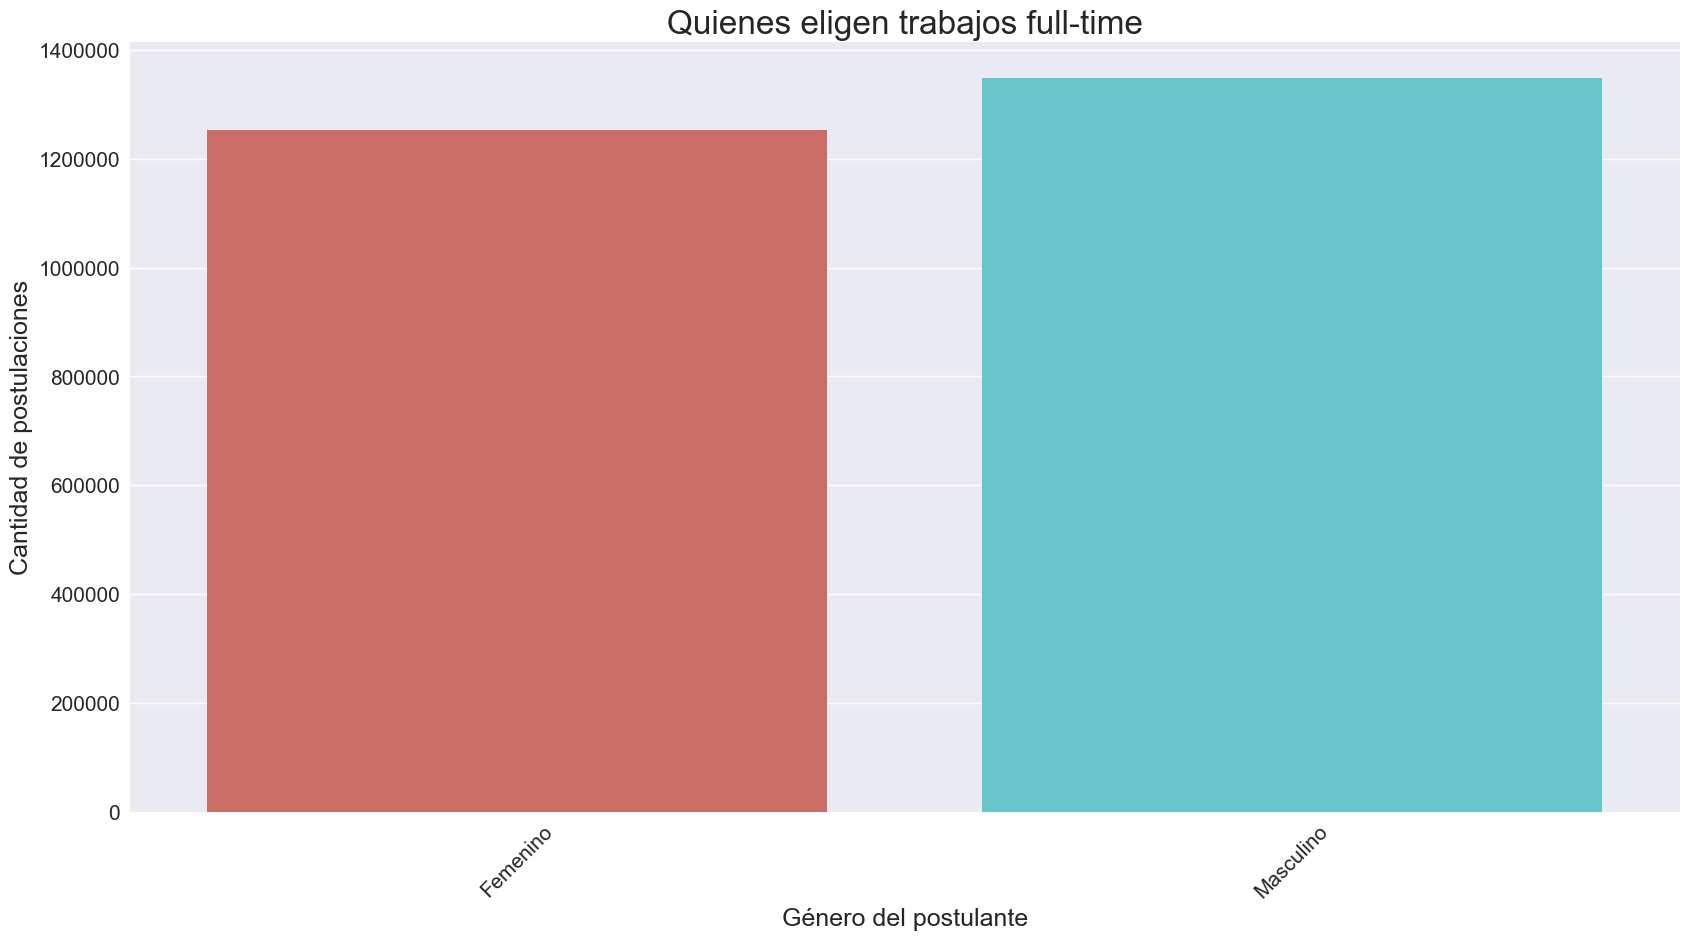

In [54]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['tipo_de_trabajo']=='Full-time'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Quienes eligen trabajos full-time", fontsize=24)

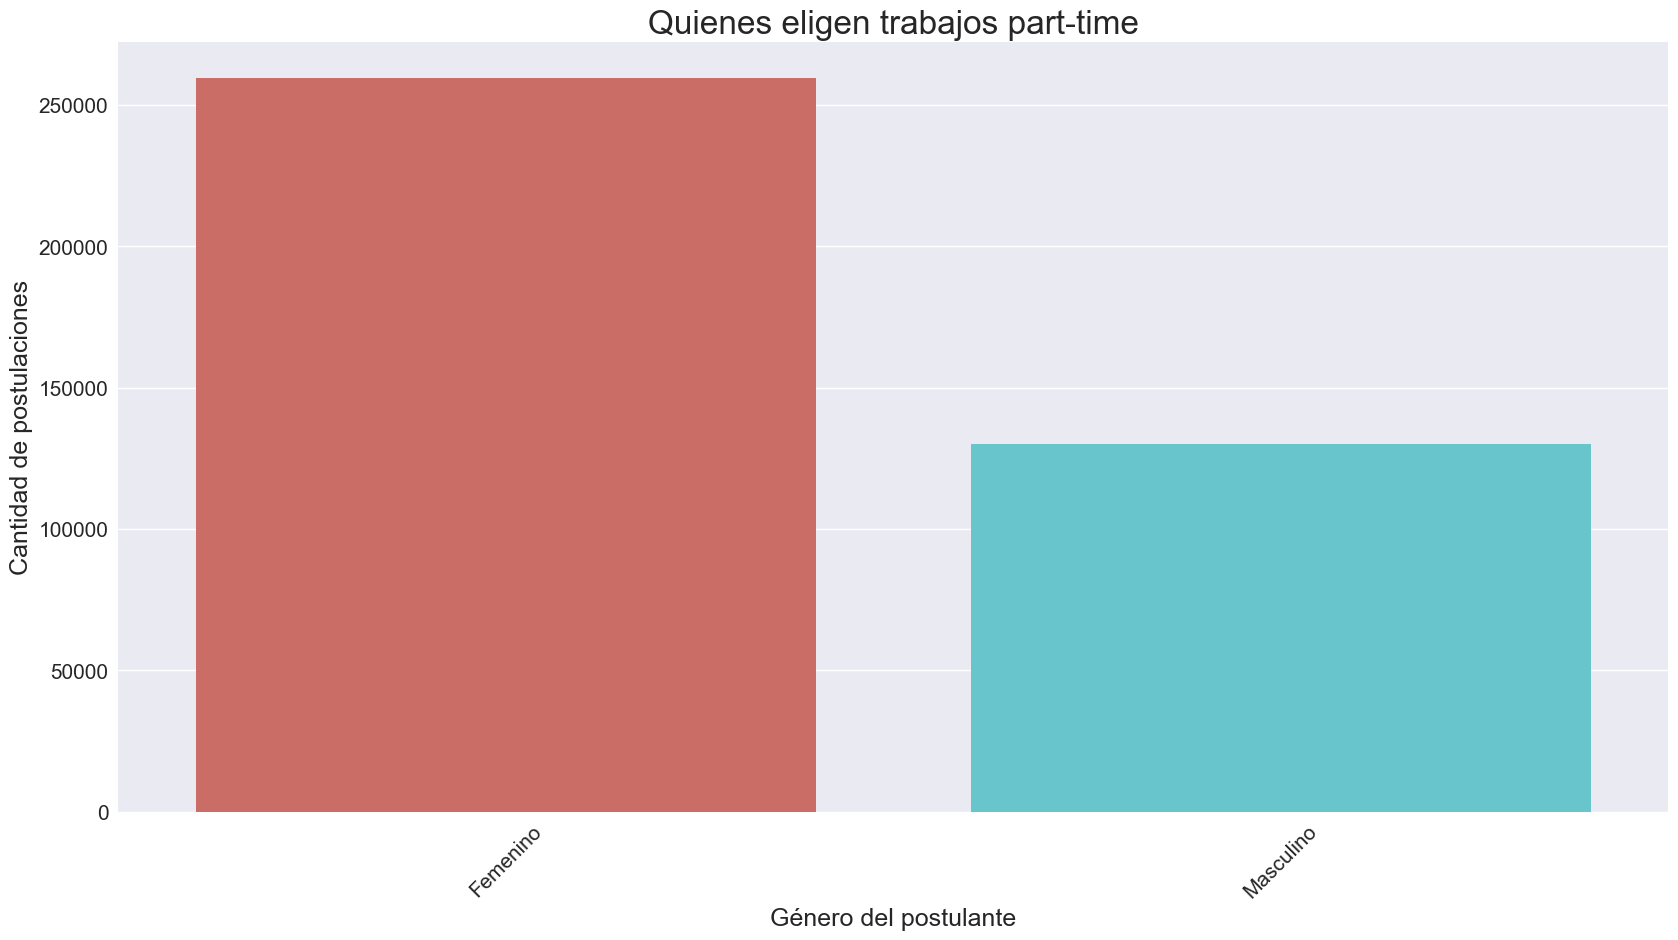

In [53]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['tipo_de_trabajo']=='Part-time'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Quienes eligen trabajos part-time", fontsize=24)

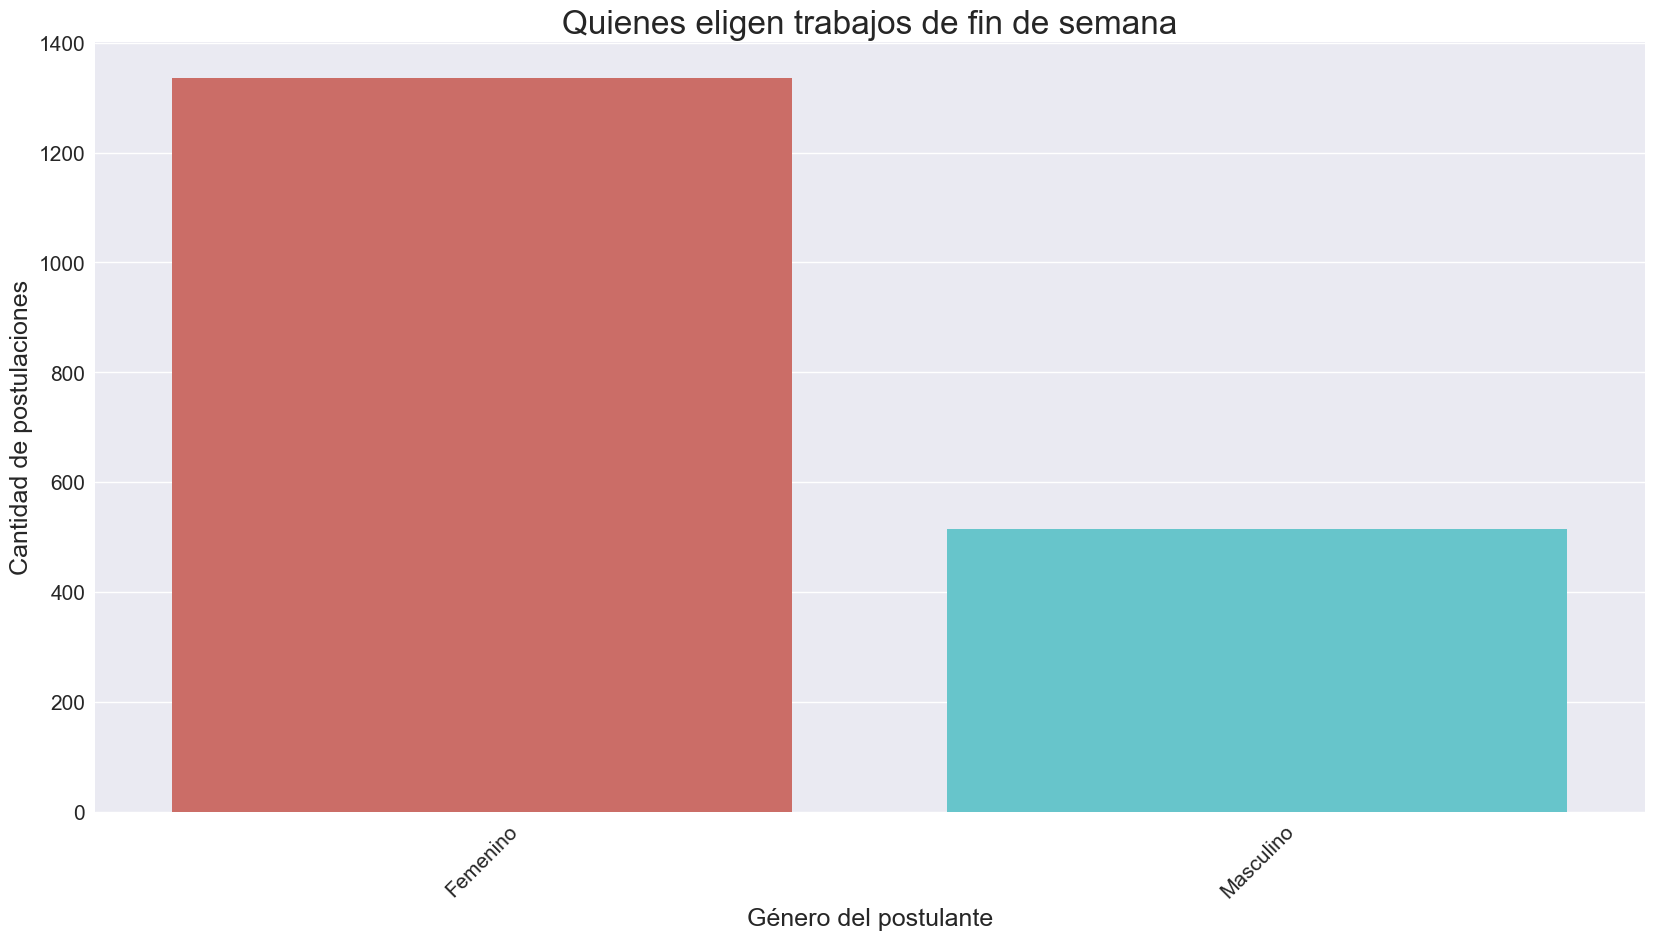

In [52]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['tipo_de_trabajo']=='Fines de Semana'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Quienes eligen trabajos de fin de semana", fontsize=24)

# Que trabajos disponibles hay los fines de semana

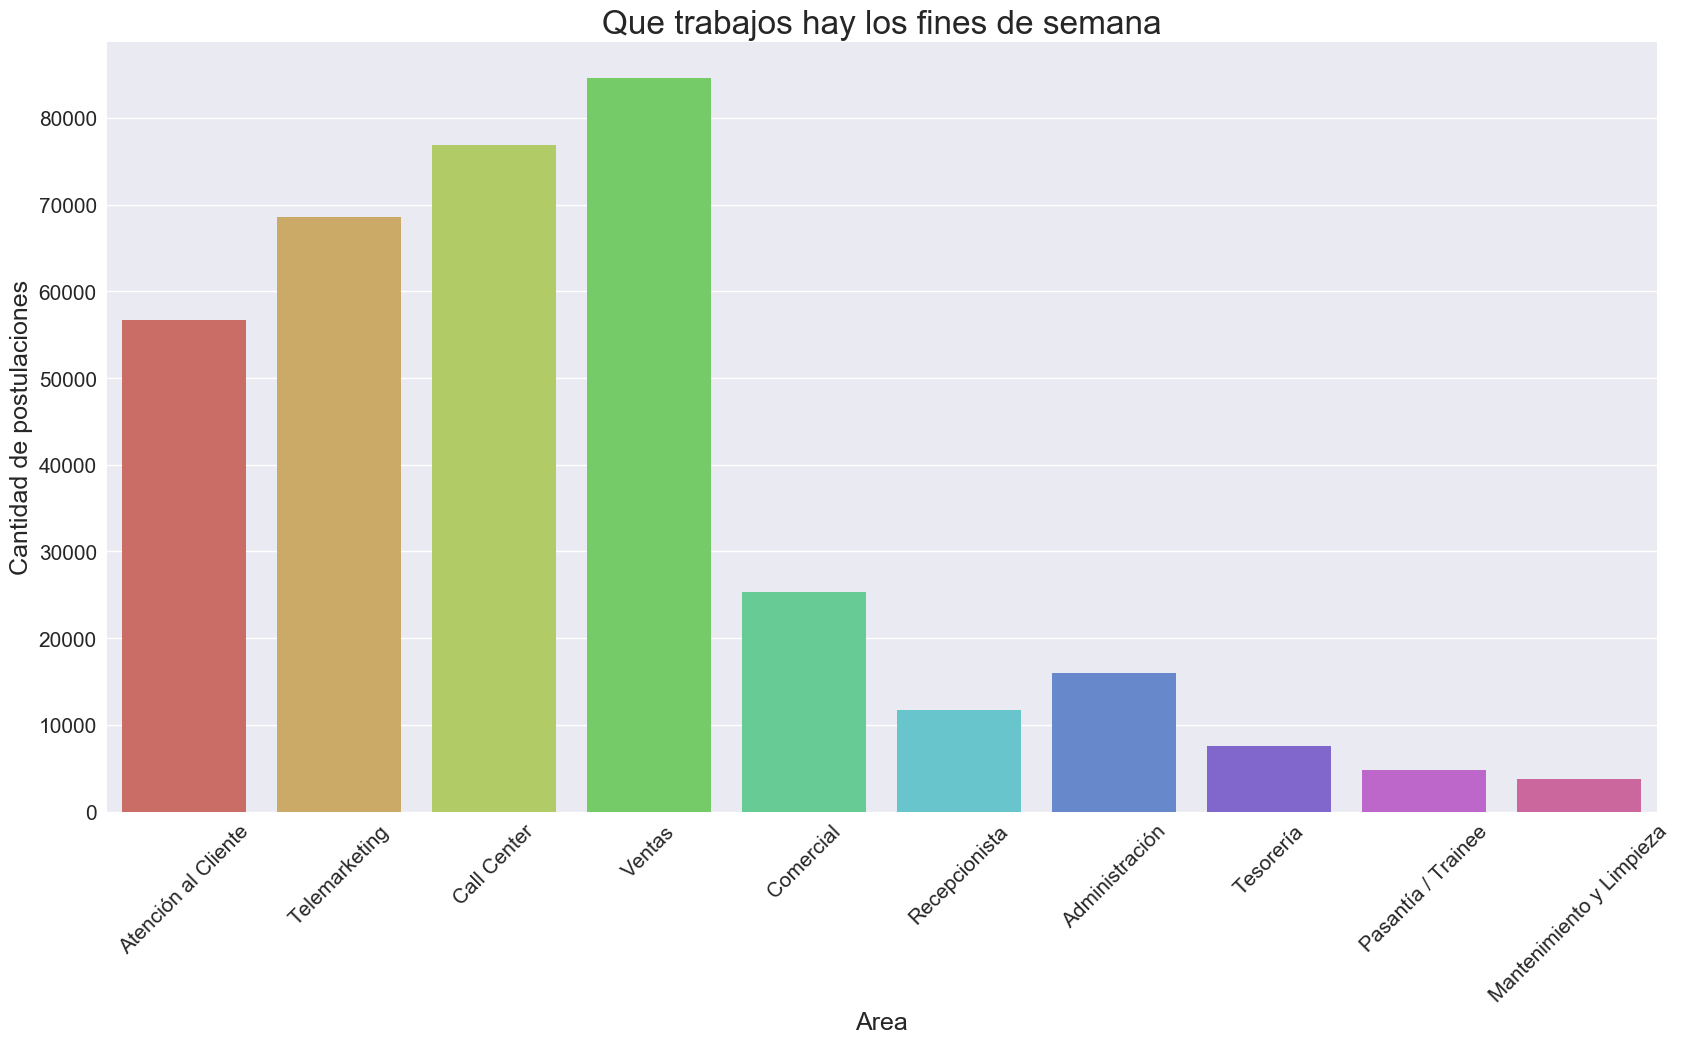

In [51]:
postulaciones_part_time = get_top_for(postulaciones[postulaciones['tipo_de_trabajo']=='Part-time'], 'nombre_area', 10)
g = sns.countplot(x='nombre_area', data=postulaciones_part_time, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Que trabajos hay los fines de semana", fontsize=24)

# Que nivel jerarquico hay en los tipos de trabajo

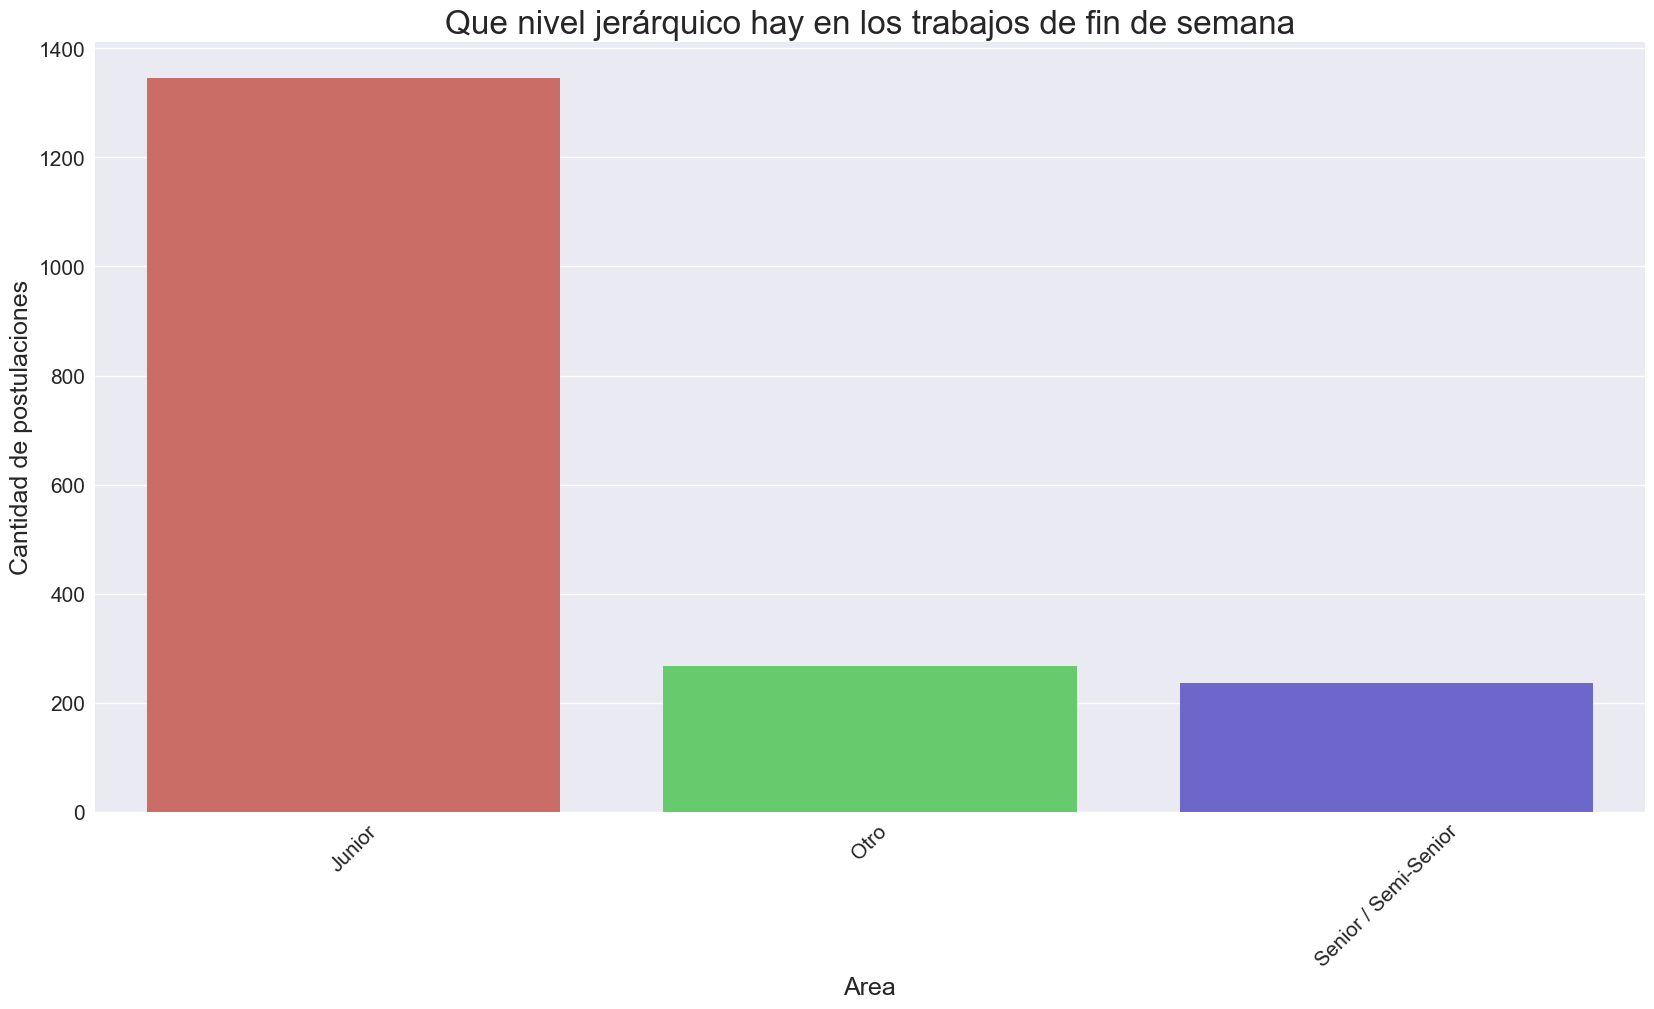

In [50]:
g = sns.countplot(x='nivel_laboral', data=postulaciones[postulaciones['tipo_de_trabajo']=='Fines de Semana'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Que nivel jerárquico hay en los trabajos de fin de semana", fontsize=24)

# Las mujeres acceden menos a las posiciones gerenciales

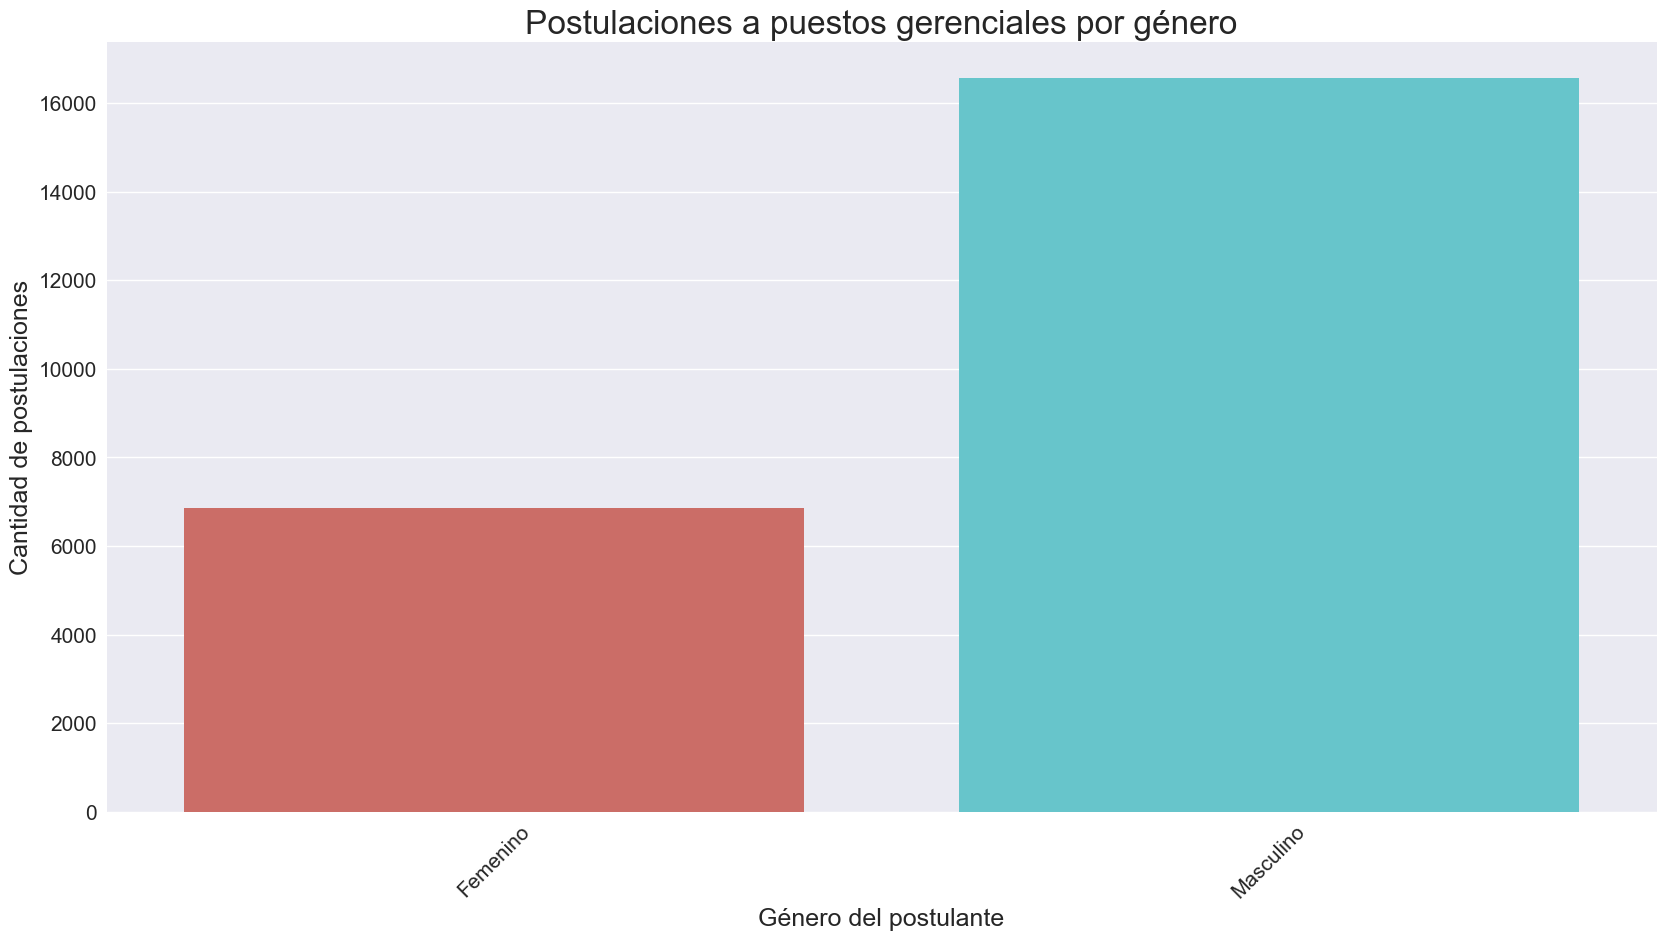

In [56]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['nivel_laboral']=='Gerencia / Alta Gerencia / Dirección'], order=['Femenino', 'Masculino'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Postulaciones a puestos gerenciales por género", fontsize=24)

# Las mujeres postulan menos a las posiciones de jefaturas

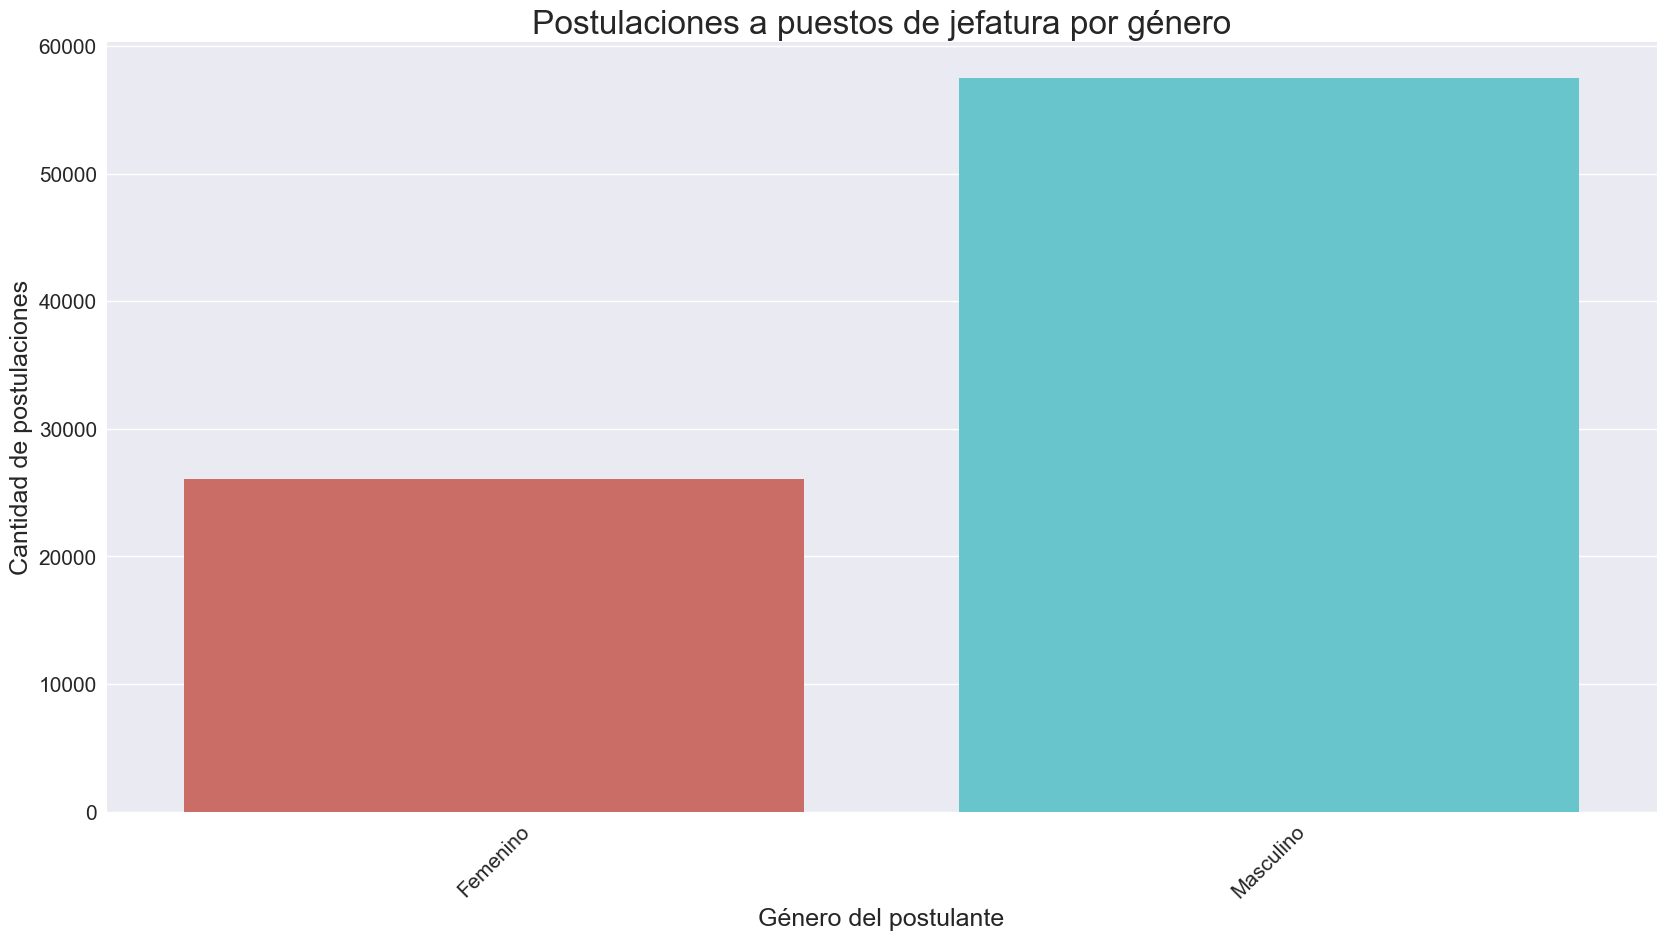

In [58]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['nivel_laboral']=='Jefe / Supervisor / Responsable'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Postulaciones a puestos de jefatura por género", fontsize=24)

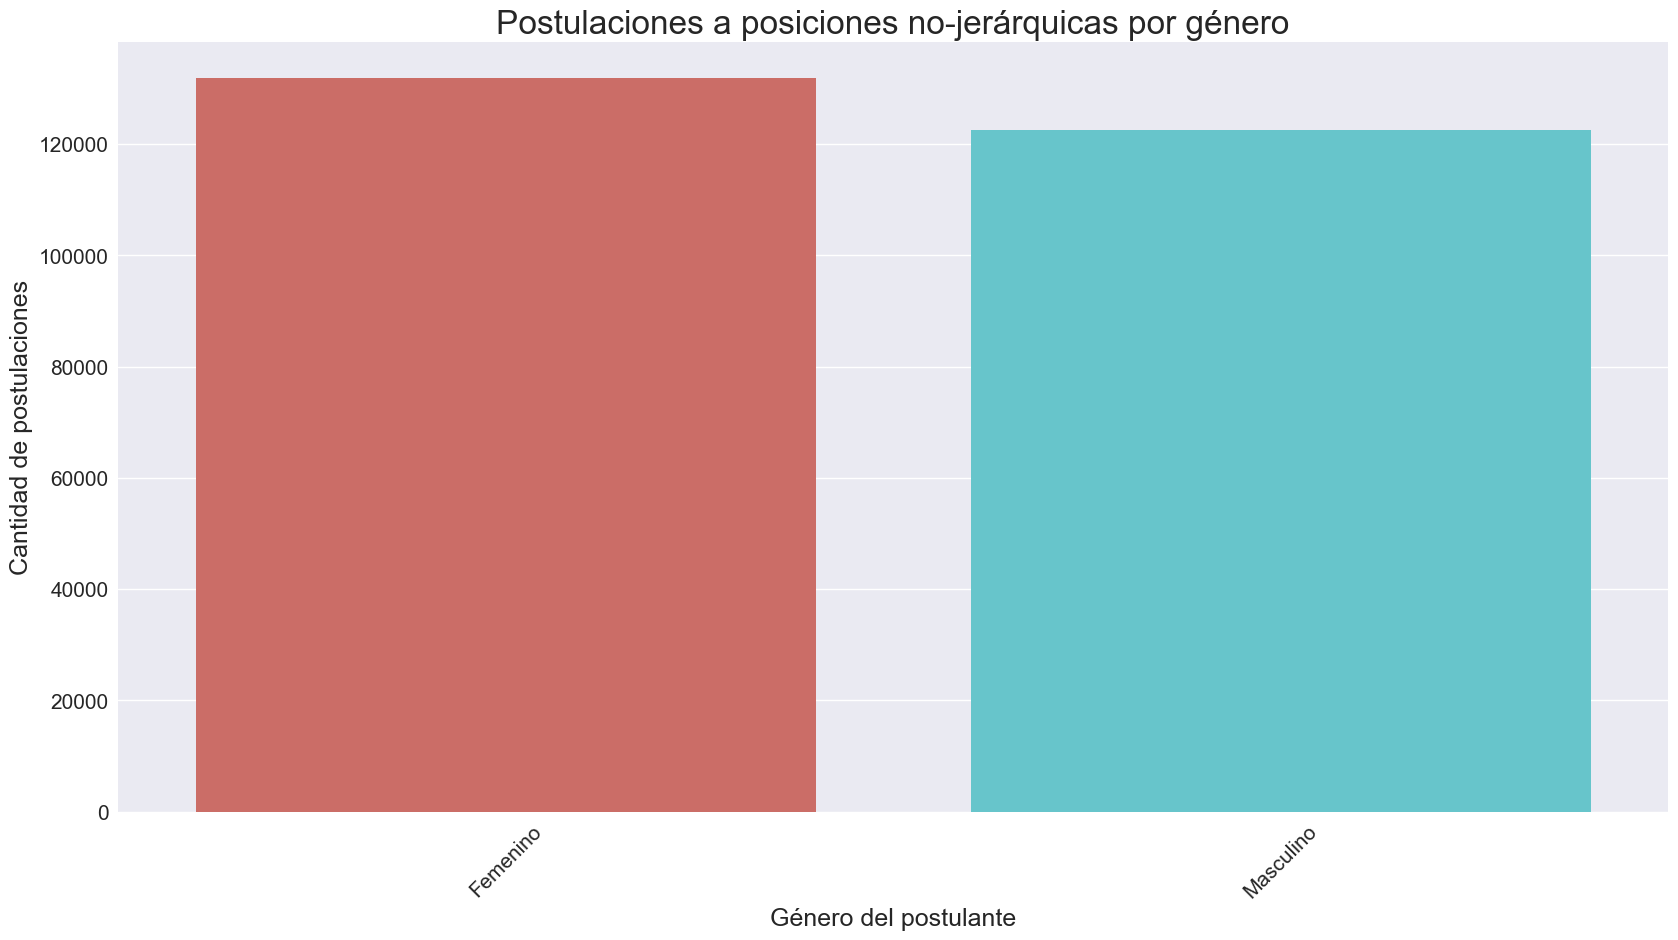

In [62]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['nivel_laboral']=='Otro'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Postulaciones a posiciones no-jerárquicas por género", fontsize=24)

# Entre los 25 y los 35 años la brecha se hace más grande

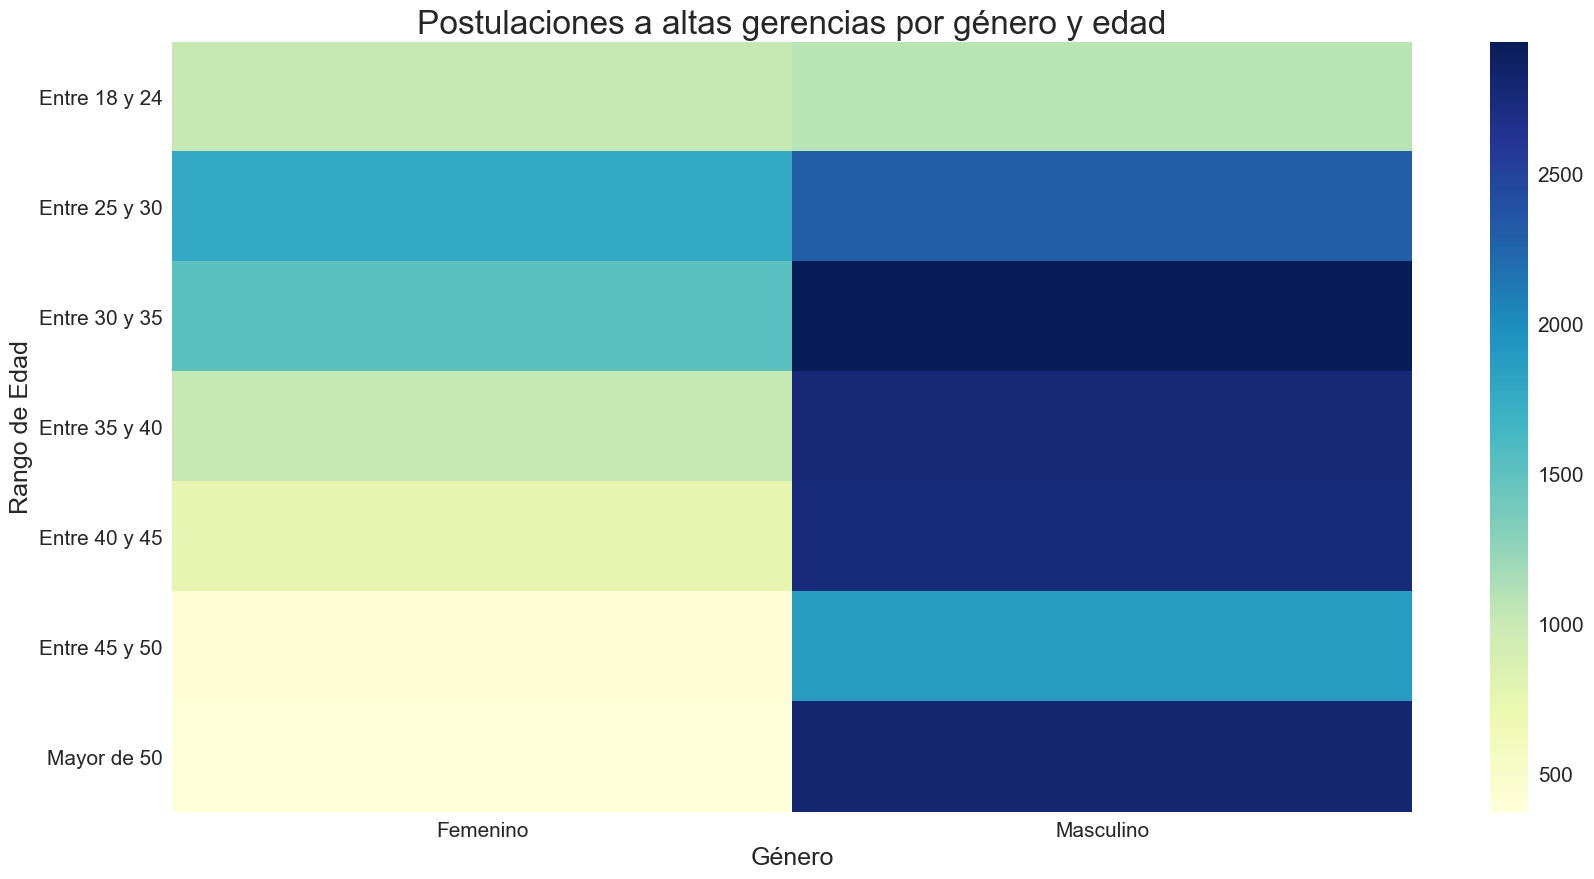

In [65]:
for_heat_map = postulaciones_gerencia.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')

g = sns.heatmap(for_heat_map,  cmap="YlGnBu")
g.set_title("Postulaciones a altas gerencias por género y edad", fontsize=24)
g.set_xlabel("Género",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

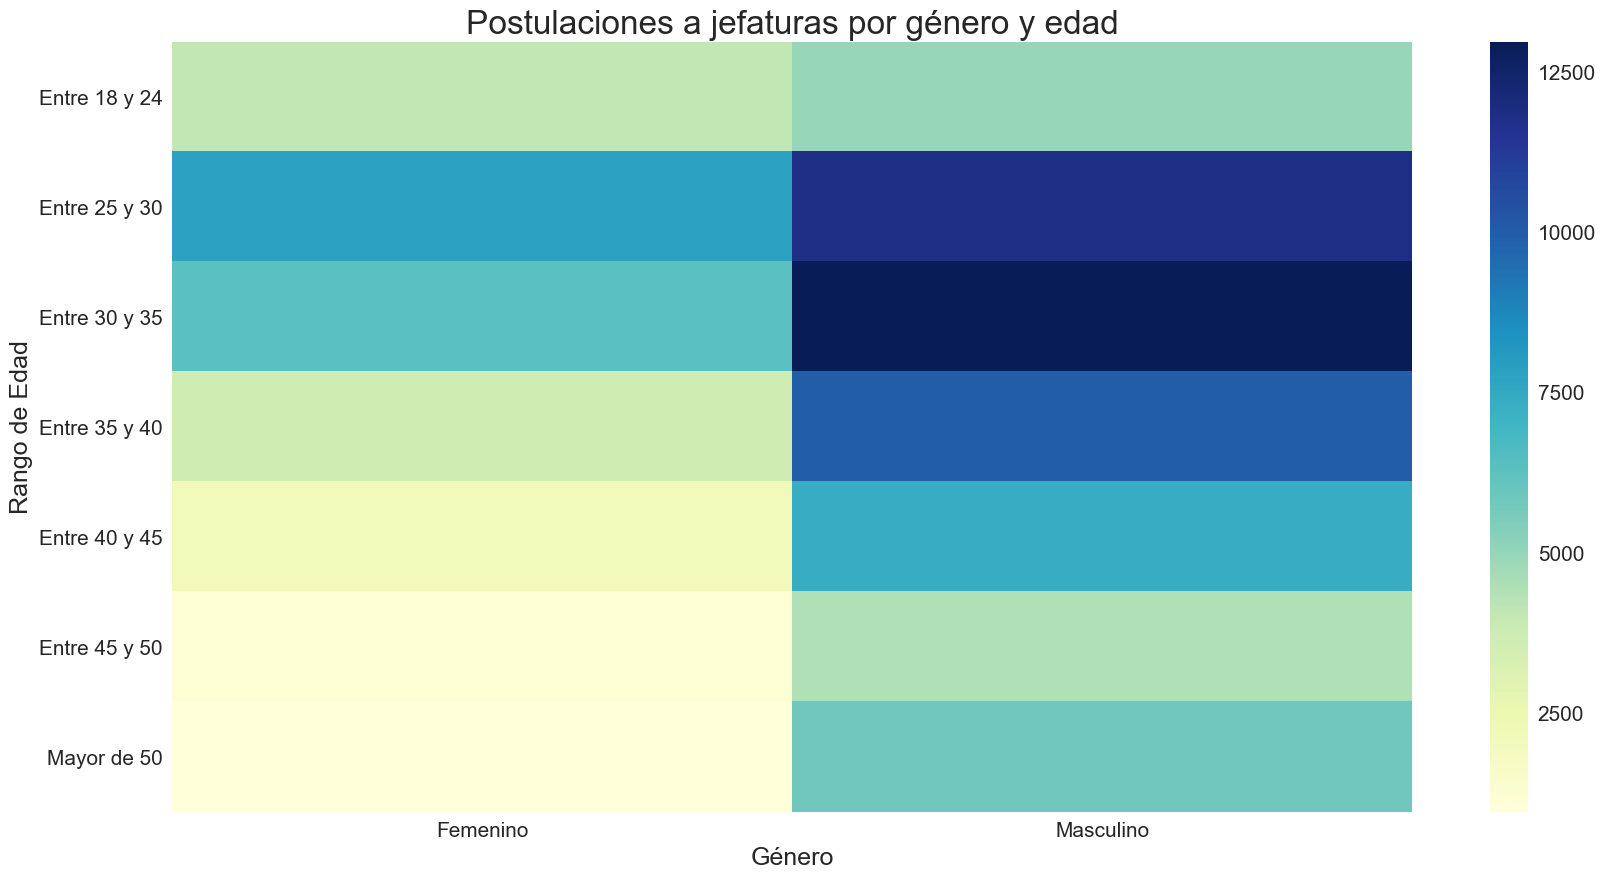

In [68]:
for_heat_map = postulaciones[postulaciones['nivel_laboral']=='Jefe / Supervisor / Responsable']
for_heat_map = for_heat_map.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')
g = sns.heatmap(for_heat_map,  cmap="YlGnBu")
g.set_title("Postulaciones a jefaturas por género y edad", fontsize=24)
g.set_xlabel("Género",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

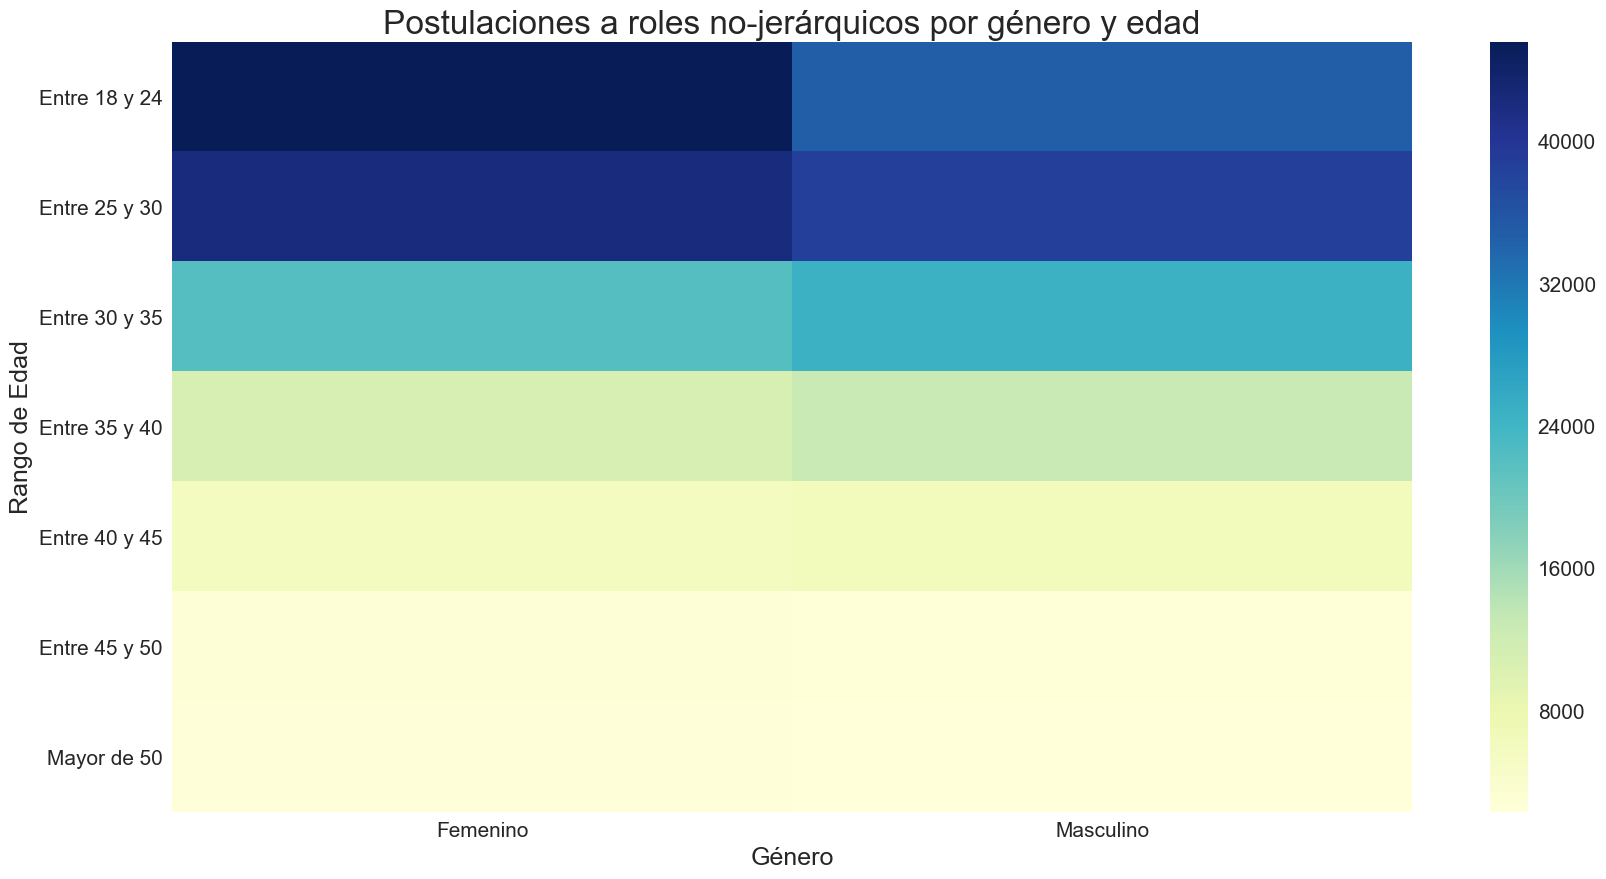

In [70]:
for_heat_map = postulaciones[postulaciones['nivel_laboral']=='Otro']
for_heat_map = for_heat_map.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')
g = sns.heatmap(for_heat_map,  cmap="YlGnBu")
g.set_title("Postulaciones a roles no-jerárquicos por género y edad", fontsize=24)
g.set_xlabel("Género",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

# La computadora personal, al cuarto del varón

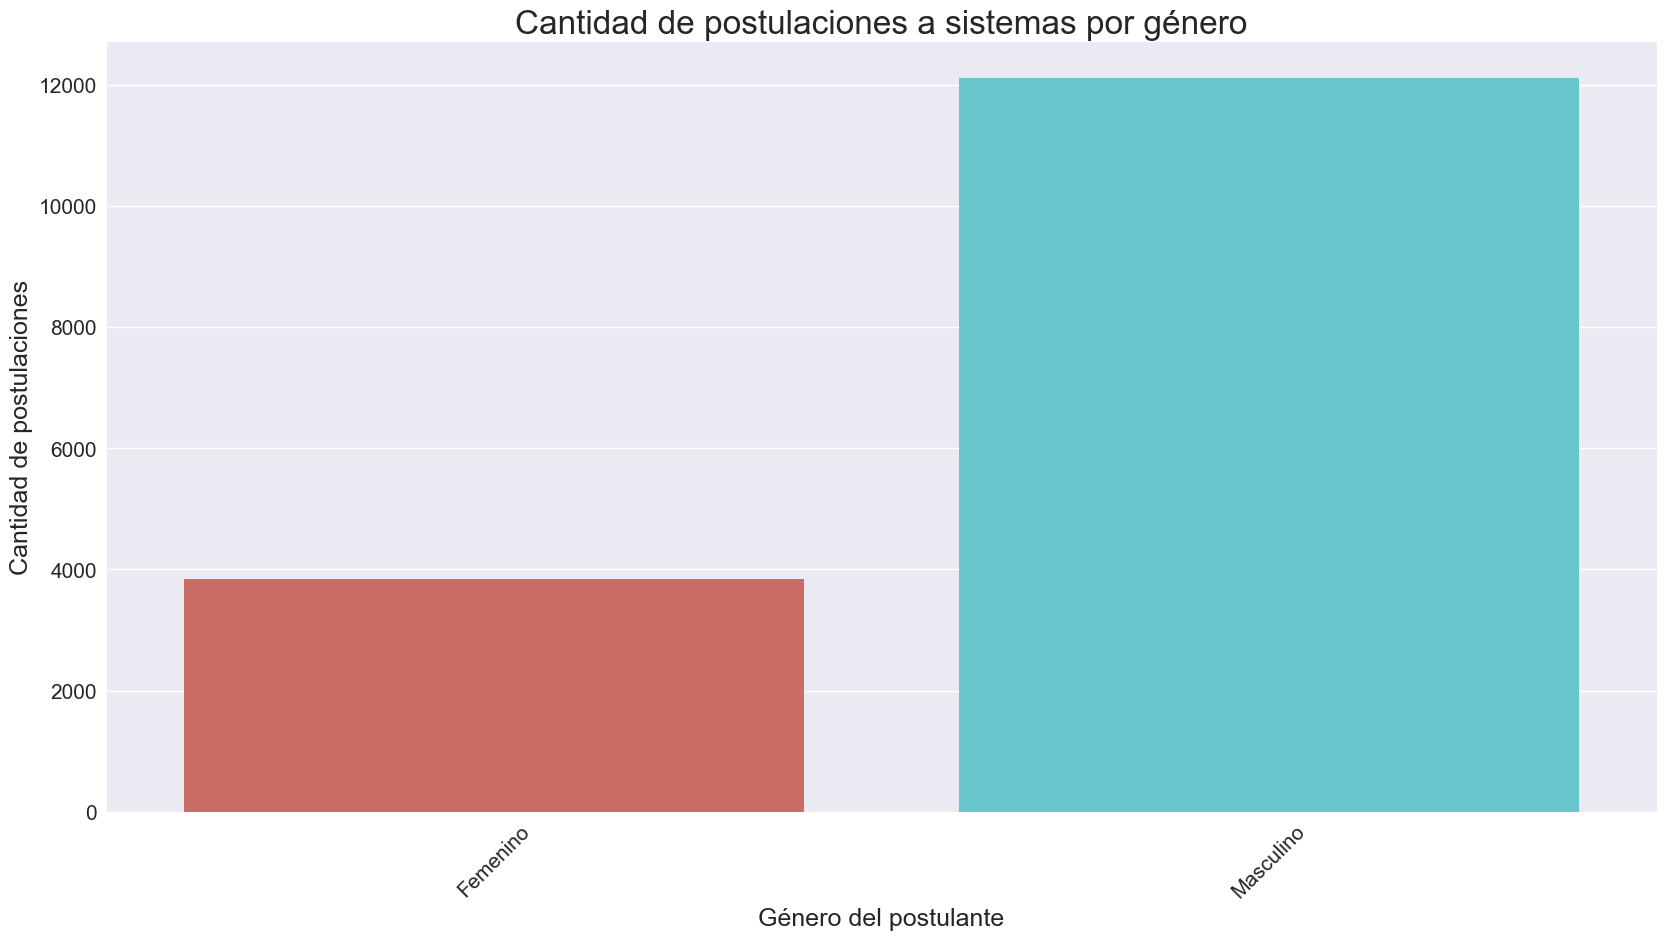

In [72]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['nombre_area']=='Tecnologia / Sistemas'], order=['Femenino', 'Masculino'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género del postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Cantidad de postulaciones a sistemas por género", fontsize=24)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


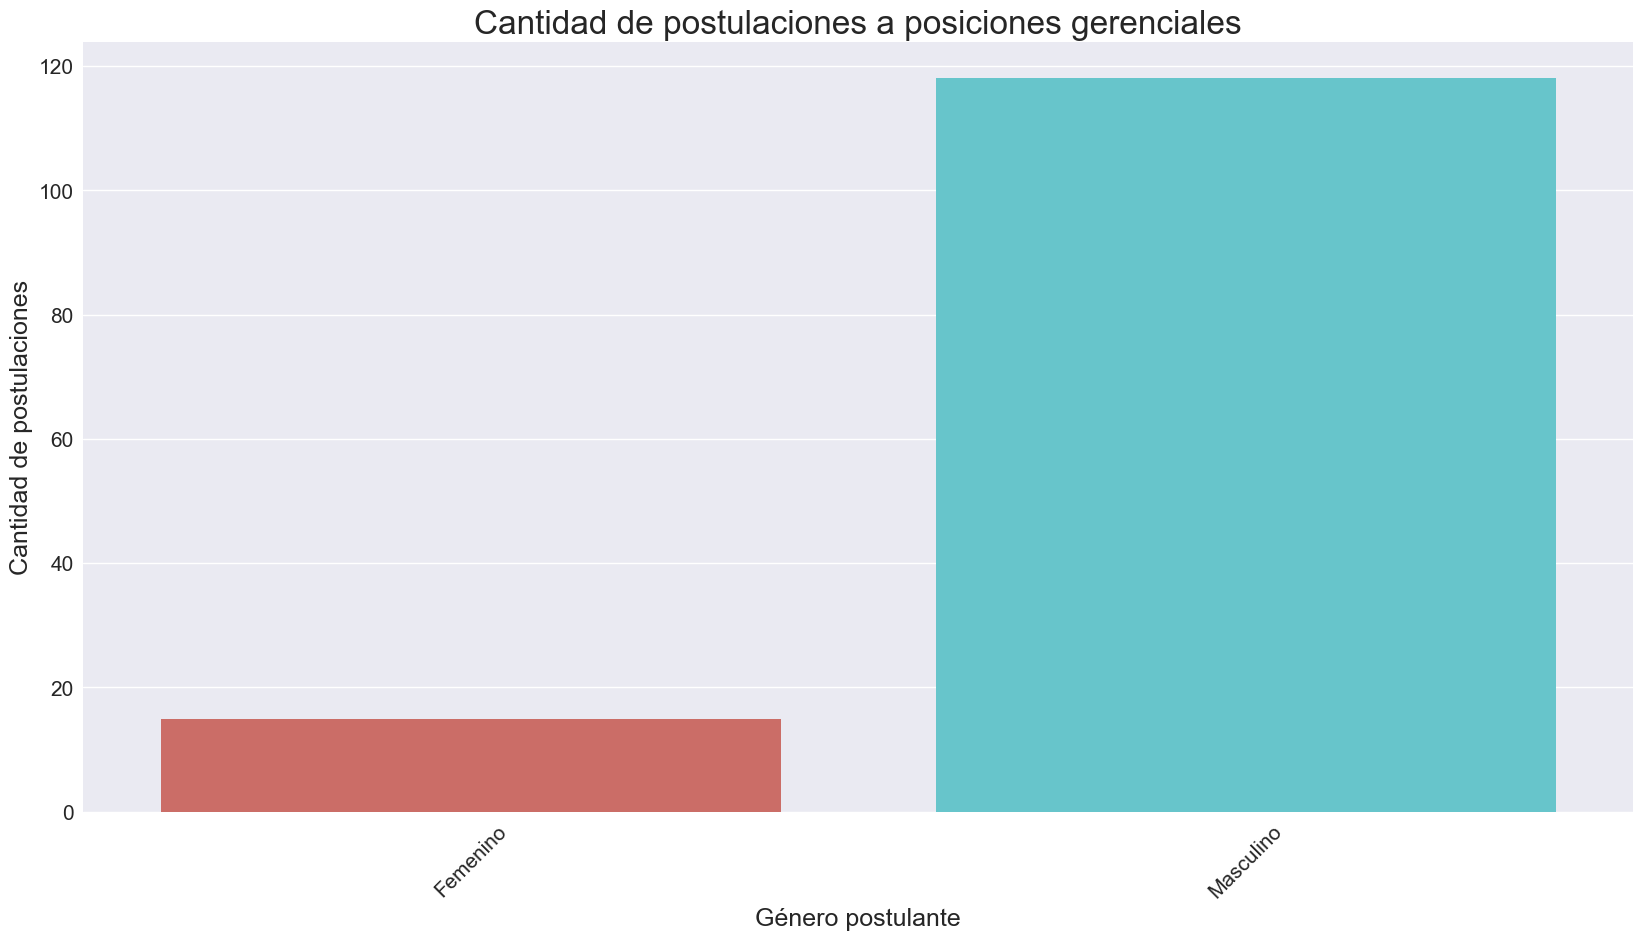

In [73]:
g = sns.countplot(x='genero_postulante', data=postulaciones[postulaciones['nombre_area']=='Tecnologia / Sistemas'][postulaciones['nivel_laboral']=='Gerencia / Alta Gerencia / Dirección'], order=['Femenino', 'Masculino'], orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género postulante", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Cantidad de postulaciones a posiciones gerenciales", fontsize=24)